## Practical Work 4

#  Adagrad-RMSProp-Adam

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [74]:
a = -1
b = 2
X = np.linspace(0,20)

In [75]:
Y = a * X + b
Y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

In [76]:
x_y={'x0':1,'x1':X , 'y':Y}
df = pd.DataFrame(x_y)
df = df.sample(frac=1)
df.head()

,x0,x1,y
40,1,16.326531,-14.326531
47,1,19.183673,-17.183673
14,1,5.714286,-3.714286
11,1,4.489796,-2.489796
13,1,5.306122,-3.306122


In [77]:
col = df.shape[1]

x = np.matrix(df.iloc[:,0:col-1])
y = np.matrix(df.iloc[:,col-1:col])

In [78]:
x

matrix([[ 1.        , 16.32653061],
        [ 1.        , 19.18367347],
        [ 1.        ,  5.71428571],
        [ 1.        ,  4.48979592],
        [ 1.        ,  5.30612245],
        [ 1.        ,  4.89795918],
        [ 1.        ,  8.57142857],
        [ 1.        ,  8.16326531],
        [ 1.        ,  2.44897959],
        [ 1.        , 15.10204082],
        [ 1.        ,  6.93877551],
        [ 1.        ,  6.53061224],
        [ 1.        , 15.91836735],
        [ 1.        , 17.14285714],
        [ 1.        ,  3.67346939],
        [ 1.        , 12.65306122],
        [ 1.        , 13.87755102],
        [ 1.        ,  2.85714286],
        [ 1.        ,  9.79591837],
        [ 1.        ,  3.26530612],
        [ 1.        ,  2.04081633],
        [ 1.        , 17.55102041],
        [ 1.        , 11.02040816],
        [ 1.        , 11.83673469],
        [ 1.        , 18.7755102 ],
        [ 1.        , 15.51020408],
        [ 1.        , 13.46938776],
        [ 1.        , 10.612

In [79]:
y

matrix([[-14.32653061],
        [-17.18367347],
        [ -3.71428571],
        [ -2.48979592],
        [ -3.30612245],
        [ -2.89795918],
        [ -6.57142857],
        [ -6.16326531],
        [ -0.44897959],
        [-13.10204082],
        [ -4.93877551],
        [ -4.53061224],
        [-13.91836735],
        [-15.14285714],
        [ -1.67346939],
        [-10.65306122],
        [-11.87755102],
        [ -0.85714286],
        [ -7.79591837],
        [ -1.26530612],
        [ -0.04081633],
        [-15.55102041],
        [ -9.02040816],
        [ -9.83673469],
        [-16.7755102 ],
        [-13.51020408],
        [-11.46938776],
        [ -8.6122449 ],
        [-12.69387755],
        [ -5.75510204],
        [  0.36734694],
        [-11.06122449],
        [  2.        ],
        [ -6.97959184],
        [-12.28571429],
        [  0.7755102 ],
        [ -2.08163265],
        [-15.95918367],
        [  1.18367347],
        [ -7.3877551 ],
        [  1.59183673],
        [ -8.204

#### Plot your data points. 

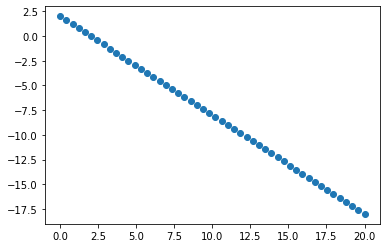

In [80]:
plt.scatter(X,Y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

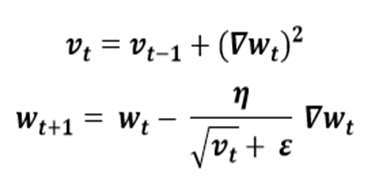

In [81]:
X.reshape(50,-1).shape

(50, 1)

In [82]:
x.shape

(50, 2)

In [83]:
np.power(2,2)

4

In [84]:
np.sqrt(4)

2.0

In [85]:
tsty = np.ones((2,1))

In [86]:
3/tsty

array([[3.],
       [3.]])

In [87]:
n = x.shape[1]
m = len(X)
theta = np.matrix(np.zeros((n,1)))
#theta = np.array([[2],[-1]])
VT = np.zeros((n,1))
#VT = np.matrix([0,0])

costs = []
preds = []
thetas = []

eps = 1e-8
alpha = 0.3
iters = 1000

def Adagrad_GD(X, Y, theta, alpha, eps, iters, VT):
  #thetas.append(np.array([[0],[0]]))
  for i in range(iters):
    thetas.append(theta)
    
    #predict  
    h = X @ theta
    preds.append(h)

    #error
    error = h - Y

    #calculate cost
    J = (error.T @ error)/(2*m)
    costs.append(J[0,0])

    #calculate gradients
    grad = (X.T @ error)/m
    
    #VT and theta
    VT = VT + np.power(grad,2)
    
    #Update thetas
    theta = theta - ((alpha * grad)/((np.sqrt(VT))+ eps))

    #thetas.append(theta)

    if i>0:
      if(np.abs(costs[i-1] - costs[i]) < 0.0001):
        break
    
  return theta, costs, preds, thetas

In [88]:
theta, costs, preds, thetas = Adagrad_GD(x, y, theta, alpha, eps, iters, VT)

In [89]:
costs[-1]

0.007819624661260708

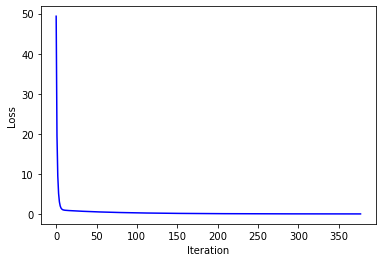

In [90]:
#Plot epochs against Loss
plt.plot(costs, 'b')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [91]:
np.array(thetas).shape

(378, 2, 1)

In [92]:
thetas

[matrix([[0.],
         [0.]]),
 matrix([[-0.3],
         [-0.3]]),
 matrix([[-0.45196471],
         [-0.45836344]]),
 matrix([[-0.54326585],
         [-0.55964668]]),
 matrix([[-0.59954342],
         [-0.62859692]]),
 matrix([[-0.63304842],
         [-0.67686424]]),
 matrix([[-0.65100323],
         [-0.71117343]]),
 matrix([[-0.6581213 ],
         [-0.73581941]]),
 matrix([[-0.65763182],
         [-0.7536903 ]]),
 matrix([[-0.65179673],
         [-0.76677998]]),
 matrix([[-0.64221529],
         [-0.77648363]]),
 matrix([[-0.63002206],
         [-0.78378423]]),
 matrix([[-0.61602244],
         [-0.78937685]]),
 matrix([[-0.60078796],
         [-0.79375389]]),
 matrix([[-0.5847238 ],
         [-0.79726453]]),
 matrix([[-0.5681169 ],
         [-0.80015655]]),
 matrix([[-0.55117023],
         [-0.80260583]]),
 matrix([[-0.53402715],
         [-0.80473727]]),
 matrix([[-0.5167887 ],
         [-0.80663957]]),
 matrix([[-0.499526  ],
         [-0.80837578]]),
 matrix([[-0.48228888],
        

In [93]:
thetas_plot = np.array(thetas).reshape(-1,2)
thetas_plot

array([[ 0.        ,  0.        ],
       [-0.3       , -0.3       ],
       [-0.45196471, -0.45836344],
       [-0.54326585, -0.55964668],
       [-0.59954342, -0.62859692],
       [-0.63304842, -0.67686424],
       [-0.65100323, -0.71117343],
       [-0.6581213 , -0.73581941],
       [-0.65763182, -0.7536903 ],
       [-0.65179673, -0.76677998],
       [-0.64221529, -0.77648363],
       [-0.63002206, -0.78378423],
       [-0.61602244, -0.78937685],
       [-0.60078796, -0.79375389],
       [-0.5847238 , -0.79726453],
       [-0.5681169 , -0.80015655],
       [-0.55117023, -0.80260583],
       [-0.53402715, -0.80473727],
       [-0.5167887 , -0.80663957],
       [-0.499526  , -0.80837578],
       [-0.48228888, -0.80999068],
       [-0.46511213, -0.81151615],
       [-0.4480199 , -0.81297485],
       [-0.43102879, -0.81438292],
       [-0.41415004, -0.81575186],
       [-0.39739114, -0.81708989],
       [-0.38075693, -0.81840289],
       [-0.36425032, -0.81969505],
       [-0.34787295,

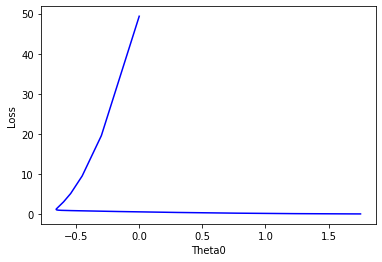

In [94]:
plt.plot(thetas_plot[:,0],costs, 'b')
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.show()

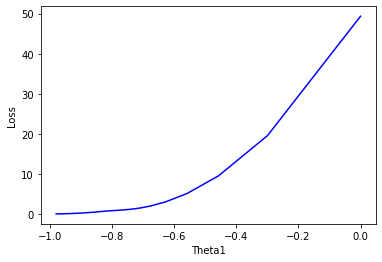

In [95]:
plt.plot(thetas_plot[:,1],costs, 'b')
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.show()

In [96]:
y_hat = x*theta
y_hat

matrix([[-14.26743447],
        [-17.071423  ],
        [ -3.85261991],
        [ -2.65091054],
        [ -3.45205012],
        [ -3.05148033],
        [ -6.65660845],
        [ -6.25603865],
        [ -0.64806158],
        [-13.0657251 ],
        [ -5.05432928],
        [ -4.65375949],
        [-13.86686468],
        [-15.06857405],
        [ -1.84977096],
        [-10.66230635],
        [-11.86401573],
        [ -1.04863138],
        [ -7.85831782],
        [ -1.44920117],
        [ -0.24749179],
        [-15.46914384],
        [ -9.06002719],
        [ -9.86116677],
        [-16.67085321],
        [-13.46629489],
        [-11.46344593],
        [ -8.6594574 ],
        [-12.66515531],
        [ -5.85546886],
        [  0.153078  ],
        [-11.06287614],
        [  1.75535716],
        [ -7.05717824],
        [-12.26458552],
        [  0.55364779],
        [ -2.25034075],
        [-15.86971363],
        [  0.95421758],
        [ -7.45774803],
        [  1.35478737],
        [ -8.258

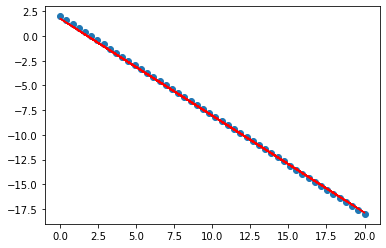

In [97]:
plt.scatter(X,Y)
plt.plot(df.x1,y_hat,color='r')
plt.show()

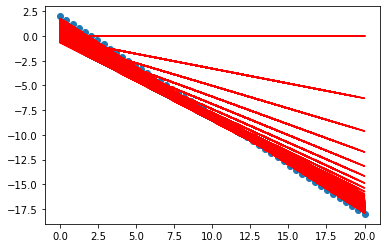

In [98]:
plt.scatter(X,Y)

for i in thetas:
  y_hat = x*i
  plt.plot(df.x1,y_hat,color='r')

In [99]:
metrics.r2_score(y,y_hat)

0.9995492216371744

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

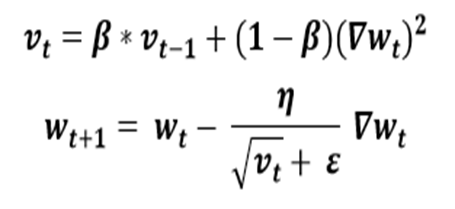

In [100]:
n = x.shape[1]
m = len(X)
theta = np.matrix(np.zeros((n,1)))
#theta = np.array([[2],[-1]])
VT = np.zeros((n,1))
#VT = np.matrix([0,0])

costs = []
preds = []
thetas = []

eps = 1e-8
alpha = 0.3
beta = 0.92
iters = 1000

def RMSPROP_GD(X, Y, theta, alpha, beta, eps, iters, VT):
  #thetas.append(np.array([[0],[0]]))
  for i in range(iters):
    thetas.append(theta)
    
    #predict  
    h = X @ theta
    preds.append(h)

    #error
    error = h - Y

    #calculate cost
    J = (error.T @ error)/(2*m)
    costs.append(J[0,0])

    #calculate gradients
    grad = (X.T @ error)/m
    
    #VT and theta
    VT = (beta * VT) + (1-beta) * np.power(grad,2)
    
    #Update thetas
    theta = theta - ((alpha * grad)/((np.sqrt(VT))+ eps))

    #thetas.append(theta)

    if i>0:
      if(np.abs(costs[i-1] - costs[i]) < 0.001):
        break
    
  return theta, costs, preds, thetas

In [101]:
theta, costs, preds, thetas = RMSPROP_GD(x, y, theta, alpha, beta, eps, iters, VT)

In [102]:
costs[-1]

0.19487161391791413

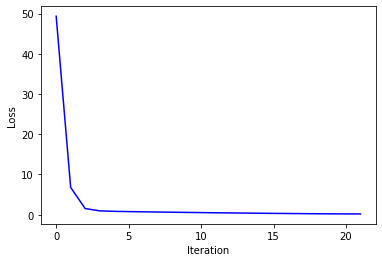

In [103]:
#Plot epochs against Loss
plt.plot(costs, 'b')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [104]:
np.array(thetas).shape

(22, 2, 1)

In [105]:
thetas_plot = np.array(thetas).reshape(-1,2)
thetas_plot

array([[ 0.        ,  0.        ],
       [-1.06066017, -1.06066017],
       [-0.60329559, -0.7080561 ],
       [-0.64437128, -0.83316929],
       [-0.51317034, -0.79420501],
       [-0.44949044, -0.82065707],
       [-0.35419525, -0.81704935],
       [-0.27495985, -0.82927529],
       [-0.18589309, -0.83212457],
       [-0.10319494, -0.84121636],
       [-0.01587612, -0.84568887],
       [ 0.06737837, -0.85390573],
       [ 0.15369058, -0.85871979],
       [ 0.23614464, -0.86680168],
       [ 0.3215069 , -0.87130023],
       [ 0.40195035, -0.87983108],
       [ 0.48658988, -0.8831537 ],
       [ 0.56318589, -0.89334006],
       [ 0.64861388, -0.89331018],
       [ 0.71691286, -0.90900129],
       [ 0.80993897, -0.8980417 ],
       [ 0.85421569, -0.93450542]])

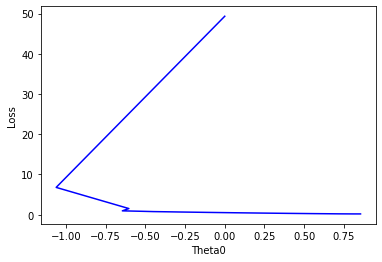

In [106]:
plt.plot(thetas_plot[:,0],costs, 'b')
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.show()

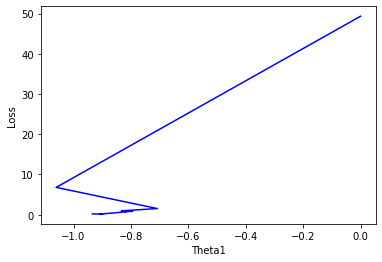

In [107]:
plt.plot(thetas_plot[:,1],costs, 'b')
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.show()

In [108]:
y_hat = x*theta
y_hat

matrix([[-13.37948765],
        [-15.89346418],
        [ -4.04186053],
        [ -2.96444201],
        [ -3.68272102],
        [ -3.32358152],
        [ -6.55583706],
        [ -6.19669755],
        [ -1.16874449],
        [-12.30206913],
        [ -5.11927904],
        [ -4.76013953],
        [-13.02034814],
        [-14.09776666],
        [ -2.246163  ],
        [-10.14723211],
        [-11.22465062],
        [ -1.52788399],
        [ -7.63325557],
        [ -1.8870235 ],
        [ -0.80960498],
        [-14.45690616],
        [ -8.71067409],
        [ -9.4289531 ],
        [-15.53432468],
        [-12.66120864],
        [-10.86551112],
        [ -8.35153458],
        [-11.94292963],
        [ -5.83755805],
        [ -0.45046548],
        [-10.50637161],
        [  0.98609254],
        [ -6.91497656],
        [-11.58379013],
        [ -0.09132597],
        [ -2.60530251],
        [-14.81604567],
        [  0.26781353],
        [ -7.27411607],
        [  0.62695304],
        [ -7.992

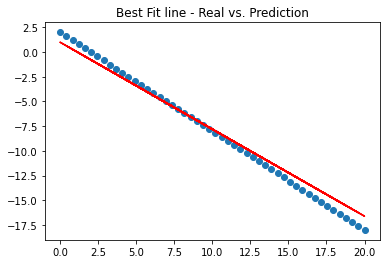

In [109]:
plt.scatter(X,Y)
plt.plot(df.x1,y_hat,color='r')
plt.title("Best Fit line - Real vs. Prediction")
plt.show()

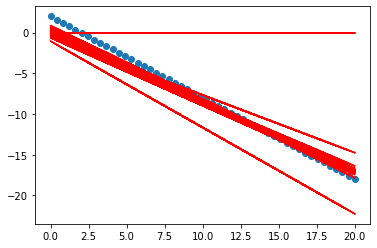

In [110]:
plt.scatter(X,Y)

for i in thetas:
  y_hat = x*i
  plt.plot(df.x1,y_hat,color='r')

In [111]:
metrics.r2_score(y,y_hat)

0.9887662246094379

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

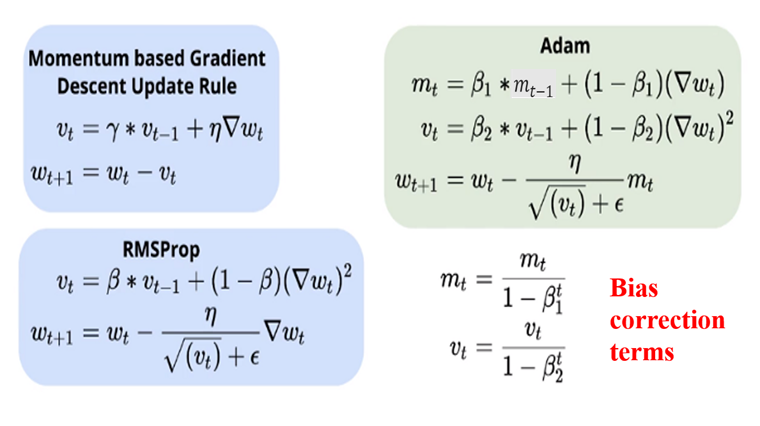

In [112]:
n = x.shape[1]
m = len(X)
theta = np.matrix(np.zeros((n,1)))
#theta = np.array([[2],[-1]])
VT = np.zeros((n,1))
mt = np.zeros((n,1))
#VT = np.matrix([0,0])

costs = []
preds = []
thetas = []

eps = 1e-8
alpha = 0.3
beta1 = 0.2
beta2 = 0.6

iters = 1000

def ADAM_GD(X, Y, theta, alpha, beta1, beta2, eps, iters, VT, mt):
  #thetas.append(np.array([[0],[0]]))
  for i in range(iters):
    thetas.append(theta)
    
    #predict  
    h = X @ theta
    preds.append(h)

    #error
    error = h - Y

    #calculate cost
    J = (error.T @ error)/(2*m)
    costs.append(J[0,0])

    #calculate gradients
    grad = (X.T @ error)/m
    
    #VT and mt and theta
    mt = (beta1 * mt) + (1-beta1) * grad
    VT = (beta2 * VT) + (1-beta2) * np.power(grad,2)
    
    #mt hat and VT hat for bias correction
    mt_hat = mt/(1-np.power(beta1,i+1))
    vt_hat = VT/(1-np.power(beta2,i+1))
    
    #Update thetas
    theta = theta - ((alpha * mt_hat)/((np.sqrt(vt_hat))+ eps))

    #thetas.append(theta)

    if i>0:
      if(np.abs(costs[i-1] - costs[i]) < 0.001):
        break
    
  return theta, costs, preds, thetas

In [113]:
theta, costs, preds, thetas = ADAM_GD(x, y, theta, alpha, beta1, beta2, eps, iters, VT, mt)

In [114]:
costs[-1]

0.007489764419947649

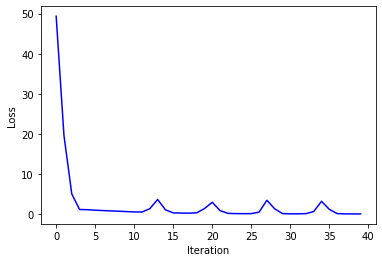

In [115]:
#Plot epochs against Loss
plt.plot(costs, 'b')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [116]:
np.array(thetas).shape

(40, 2, 1)

In [117]:
thetas_plot = np.array(thetas).reshape(-1,2)
thetas_plot

array([[ 0.        ,  0.        ],
       [-0.3       , -0.3       ],
       [-0.55615259, -0.56158876],
       [-0.72228617, -0.74942089],
       [-0.75142287, -0.83153602],
       [-0.65988193, -0.82243716],
       [-0.53342037, -0.79760602],
       [-0.42510942, -0.81213182],
       [-0.29611626, -0.83078933],
       [-0.12882206, -0.83251991],
       [ 0.03697028, -0.86295183],
       [ 0.25859435, -0.83522166],
       [ 0.35299006, -0.99694064],
       [ 0.70830965, -0.67973716],
       [ 0.45404297, -0.98936576],
       [ 0.63756969, -0.87842634],
       [ 0.71562741, -0.89553274],
       [ 0.79958509, -0.92611304],
       [ 0.96647523, -0.87804386],
       [ 0.93377948, -1.05373677],
       [ 1.27567307, -0.74077029],
       [ 1.02133978, -1.03071037],
       [ 1.18920985, -0.90932029],
       [ 1.21119354, -0.94833607],
       [ 1.29308551, -0.93802484],
       [ 1.34560784, -0.97139427],
       [ 1.51430548, -0.88496772],
       [ 1.28297181, -1.16973819],
       [ 1.62806042,

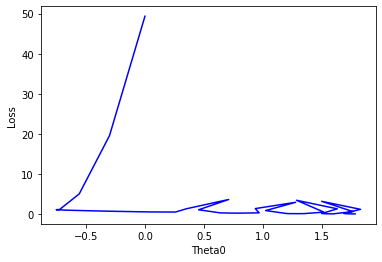

In [118]:
plt.plot(thetas_plot[:,0],costs, 'b')
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.show()

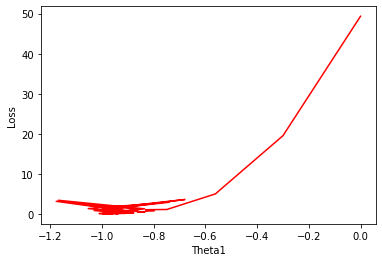

In [119]:
plt.plot(thetas_plot[:,1],costs, 'r')
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.show()

In [120]:
y_hat = x*theta
y_hat

matrix([[-14.01124287],
        [-16.78321988],
        [ -3.71532829],
        [ -2.52733814],
        [ -3.31933157],
        [ -2.92333486],
        [ -6.48730529],
        [ -6.09130858],
        [ -0.54735457],
        [-12.82325273],
        [ -4.90331843],
        [ -4.50732172],
        [-13.61524616],
        [-14.8032363 ],
        [ -1.73534471],
        [-10.44727244],
        [-11.63526258],
        [ -0.94335128],
        [ -7.67529543],
        [ -1.339348  ],
        [ -0.15135785],
        [-15.19923302],
        [ -8.86328558],
        [ -9.65527901],
        [-16.38722316],
        [-13.21924944],
        [-11.23926587],
        [ -8.46728886],
        [-12.42725601],
        [ -5.69531186],
        [  0.24463886],
        [-10.84326915],
        [  1.82862572],
        [ -6.88330201],
        [-12.0312593 ],
        [  0.64063558],
        [ -2.13134143],
        [-15.59522973],
        [  1.03663229],
        [ -7.27929872],
        [  1.43262901],
        [ -8.071

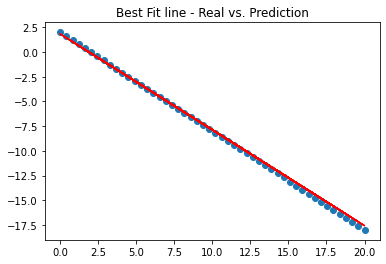

In [121]:
plt.scatter(X,Y)
plt.plot(df.x1,y_hat,color='r')
plt.title("Best Fit line - Real vs. Prediction")
plt.show()

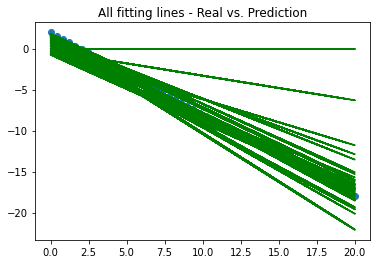

In [122]:
plt.scatter(X,Y)
plt.title("All fitting lines - Real vs. Prediction")
for i in thetas:
  y_hat = x*i
  plt.plot(df.x1,y_hat,color='g')

In [123]:
metrics.r2_score(y,y_hat)

0.9995682371099089

## Congratulations 
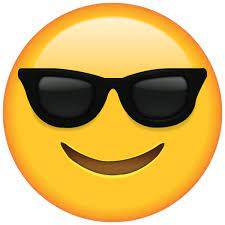